In [1]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [2]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('5fs_impedance_training_set.xlsx')
df

,Task_Label,ImP_insp_dur_mean,ImP_insp_dur_sd,ImP_exp_dur_mean,ImP_exp_dur_sd,ImP_insp_amp_mean,ImP_insp_amp_sd,ImP_exp_amp_mean,ImP_exp_amp_sd,ImP_insp_flow_mean,...,ImP_ie_ratio_sd,ImP_duty_cycle_mean,ImP_exp_diff_mean,ImP_RSP_Symmetry_PeakTrough,ImP_RRV_RMSSD,ImP_RSP_Rate_Mean,ImP_insp_minu_depth,ImP_exp_minu_depth,Participant,Classification
0,12.0a,1.640000,0.185712,1.694000,0.171499,323885.357884,50985.092943,317870.979681,46774.304708,196665.717150,...,0.048638,0.489158,0.118857,0.517348,382.434308,17.917119,5.803093e+06,5.695332e+06,10785,0
1,12.0b,1.634222,0.085190,1.748000,0.173505,313992.429670,30734.204708,302703.150632,31615.925634,192668.756024,...,0.069124,0.485452,0.225143,0.527694,390.361005,17.593419,5.524200e+06,5.325583e+06,10785,0
2,12.0c,2.147429,0.257242,2.272000,0.222699,360328.745266,31615.118946,357316.980259,26435.238020,169103.417695,...,0.050025,0.476758,0.236000,0.520548,434.669530,14.228375,5.126892e+06,5.084040e+06,10785,0
3,12.0d,1.801714,0.101031,1.931429,0.190379,262864.521763,29114.145601,257946.280446,25312.370962,146059.536736,...,0.071244,0.483507,0.250667,0.530733,403.425334,15.631763,4.109036e+06,4.032155e+06,10785,0
4,12.0e,2.022286,0.281822,2.132000,0.174310,302394.056689,43005.468164,300029.973143,28574.347285,149624.081718,...,0.124387,0.481444,0.140800,0.527149,483.103302,14.459799,4.372557e+06,4.338373e+06,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,85,1.432000,0.115903,1.499600,0.274684,50248.035736,8019.865362,49578.208695,14865.886766,34952.658882,...,0.265283,0.489451,0.240000,0.523436,318.223192,20.448106,1.027477e+06,1.013780e+06,98586,0
2570,87,1.754857,0.761042,2.301714,0.764264,155932.708382,121971.615000,162248.972238,102499.398673,89434.766797,...,0.375168,0.427189,0.708000,0.511816,1236.868088,14.850920,2.315744e+06,2.409547e+06,98586,1
2571,89,1.444000,0.082365,1.433600,0.122849,49309.989182,6323.609559,47141.201677,12526.615103,34207.085310,...,0.082769,0.499069,0.119556,0.543171,159.285907,19.592504,9.661062e+05,9.236142e+05,98586,0
2572,91,1.653500,0.754087,1.872000,0.980966,88431.815723,47869.716992,97634.770113,51080.627080,53137.019840,...,0.546540,0.482030,1.567500,0.472444,2899.130116,17.159436,1.517440e+06,1.675358e+06,98586,1


                        Feature  Mutual_Information
15            ImP_exp_diff_mean            0.285164
3                ImP_exp_dur_sd            0.282446
17                ImP_RRV_RMSSD            0.237998
9              ImP_insp_flow_sd            0.184565
13              ImP_ie_ratio_sd            0.176002
14          ImP_duty_cycle_mean            0.159269
5               ImP_insp_amp_sd            0.146922
7                ImP_exp_amp_sd            0.118690
16  ImP_RSP_Symmetry_PeakTrough            0.112580
12            ImP_ie_ratio_mean            0.098606


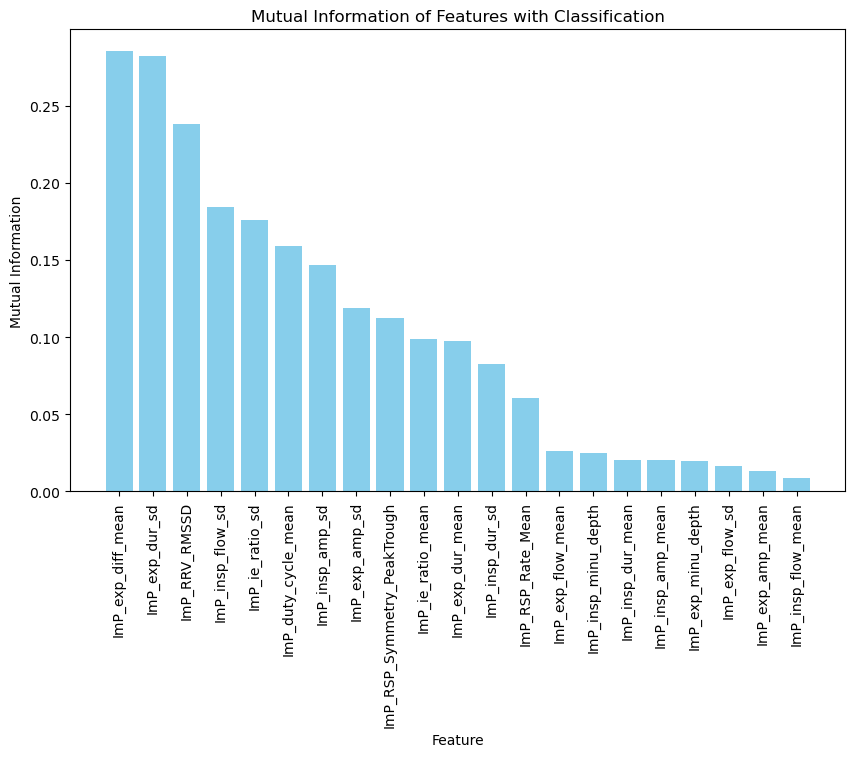

   ImP_exp_diff_mean  ImP_exp_dur_sd  ImP_RRV_RMSSD  ImP_insp_flow_sd  \
0           0.118857        0.171499     382.434308      15663.415593   
1           0.225143        0.173505     390.361005      20811.126431   
2           0.236000        0.222699     434.669530      16277.918645   
3           0.250667        0.190379     403.425334      15714.039237   
4           0.140800        0.174310     483.103302       6162.134521   

   ImP_ie_ratio_sd  ImP_duty_cycle_mean  ImP_insp_amp_sd  ImP_exp_amp_sd  \
0         0.048638             0.489158     50985.092943    46774.304708   
1         0.069124             0.485452     30734.204708    31615.925634   
2         0.050025             0.476758     31615.118946    26435.238020   
3         0.071244             0.483507     29114.145601    25312.370962   
4         0.124387             0.481444     43005.468164    28574.347285   

   ImP_RSP_Symmetry_PeakTrough  ImP_ie_ratio_mean Task_Label  Participant  \
0                     0.517

In [3]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [4]:
writer = pd.ExcelWriter('5fs_impedance_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_47778/2925967420.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
